## __Task__

Prepare an analysis of the titanic dataset (data/titanic.csv).
You are interested in determining factors that lead to death or survival of passengers.
However, before actually training an ML model to predict death or survival, you should make
yourself familiar with the data.

Look into which features are available, what types of features these are, whether
values are missing and how to deal with them, etc.
You can then continue to create some visualizations of things you think might be interesting or relevant
in predicting survival, or just generally useful to know about the dataset.
The output should not just be prints of numbers or figures, but also some explanatory text of
what you have been analysing, and which conclusions you can draw from the different steps of your analysis.

You can do all of this in a Jupyter Notebook, embedding analysis, code and explanations in a single document.
Alternatively you can create a separate script for the analysis, and then list results, figures and explanations
either in the PR directly, or in some form of pdf/word/markdown/... document.

For this exercise I very much encourage you to work together to come up with ideas of which
calculations/plots/... might be interesting to analyse. You will find very many such analyses online
for the titanic data, but I would recommend trying to think of your own ideas first, and only later
look for more inspiration online.

### __Titanic statistics__

>In these graphs we will analyse how the survival rate changes on the requirements Gender, Age, Passenger Class and the Cabin. Furthermore there is a table of contents down below, where you can Navigate to the specific graphs and other things.

#### Table of contents
- [Males and Females on board](#onboardsplitbygender)
- [Survived statistic Male & Female](#agemalefemalesurvivors)
- [Survival Rate by Gender](#survivalratebygender)
- [Survival Rate by Pclass](#survivalratebypclass)
- [Conclusion of all the Stats](#conclusion)

#### Import these libraries to be able to run code

If needed you can install or check these all the specific packages on your terminal with a one liner:
- pip install pandas numpy seaborn pathlib matplotlib


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt


#### Reading file and using Panda to show table
 >Run this code to open the csv file

In [20]:
filepath = Path.cwd().parents[1] / 'data' / 'titanic.csv'
titanic_statistics = pd.read_csv(filepath)
titanic_statistics

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id='onboardsplitbygender'></a>
#### Males & Females on board
>This just represents how many passengers where on the Titanic, there is about x2 as much males as females

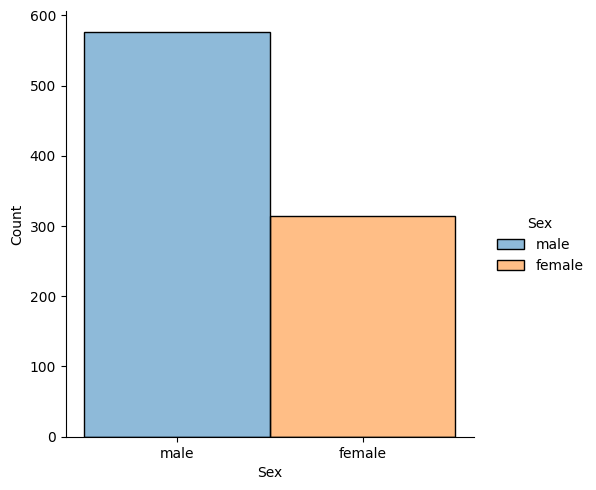

In [21]:
sns.displot(data=titanic_statistics, x='Sex', hue='Sex')

<a id='agemalefemalesurvivors'></a>
#### Survived statistic Male & Female
>This graph represents the age of passengers also split up by gender and survival status, the left graph represents the passengers who did not survive (Survived = 0). While the right graph represents the passengers who did survive (Survived = 0). On the first graph it is apparent that there is a larger number of males that did not survice across most age groups, while the highest count is from 20's to early 30's. While in the right graph there is a notable count on the younger ages.

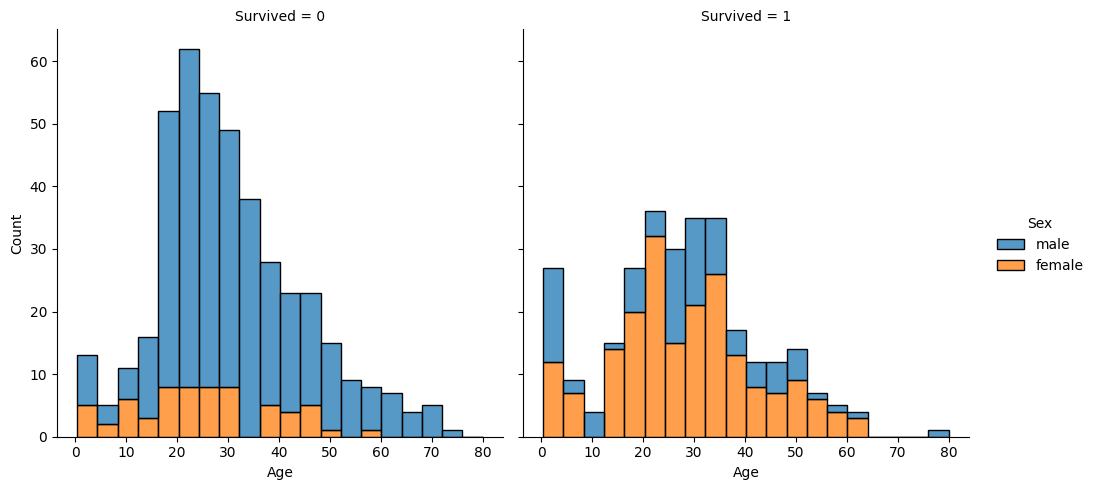

In [22]:
sns.displot(data=titanic_statistics, x='Age', hue='Sex', col='Survived', multiple='stack')

<a id='survivalratebygender'></a>
#### Survival Percentage by Gender
>The two bars represent the percentage of the survival rate split up by gender, it is also apparent that the survival rate is significantly higher of females survived when compared to males. This also shows that in the past wife and children used to have priority for lifeboats.

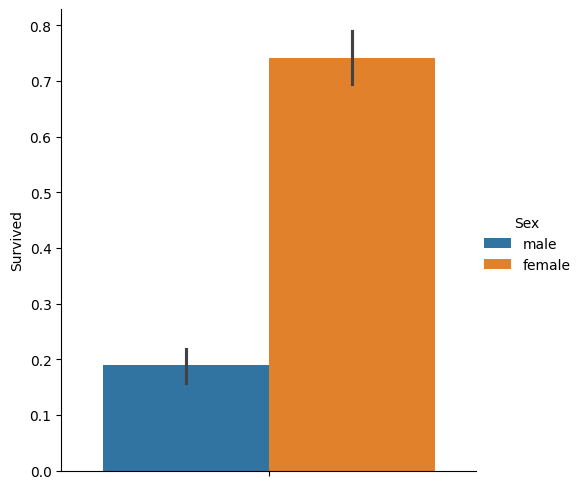

In [23]:
sns.catplot(kind='bar', data=titanic_statistics, y='Survived', hue='Sex',)

<a id='survivalratebypclass'></a>
#### Survival rate by Passenger class
>This graph represents how the survival rate was in the different passenger classes 1, 2 and 3, and as you can see does the first Passenger class have the highest survival percentage. While there is a bigger difference between class 1 and 2 for females, is there a not big difference for males. The third class had the lowest survival percentage.

<Axes: xlabel='Pclass', ylabel='Survival Percentage'>

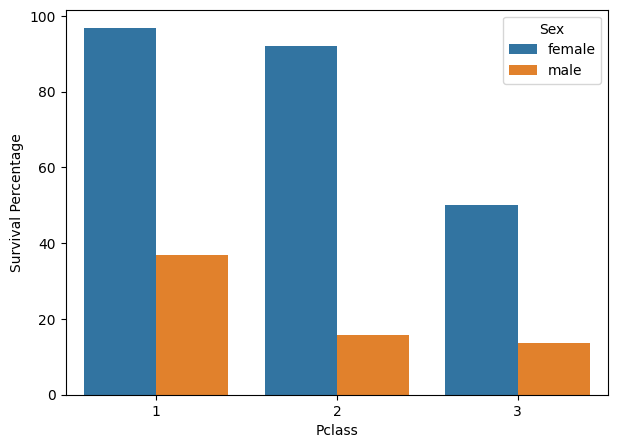

In [24]:
f, ax = plt.subplots(figsize=(7, 5))

grouped = titanic_statistics.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'Survived': 'Survival Percentage'})


sns.barplot(data=grouped, x='Pclass', y='Survival Percentage', hue='Sex')

<a id='conclusion'></a>
### Conclusion
______________
Overall if you look at the statistics there is a difference. These people had the highest survival percentage:
- Female
- Young Age
- First Passenger class